# Intro to Python Projects

## Module 5 Project 1 ~ Intro to API

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from nba_api.stats.static import teams

nba_teams = teams.get_teams()
df_teams = pd.DataFrame(nba_teams)
print(df_teams.head())

df_warriors = df_teams[df_teams['nickname']=='Warriors']
print(df_warriors)
id_warriors = df_warriors['id'].values[0]
print(id_warriors)

           id             full_name abbreviation   nickname         city  \
0  1610612737         Atlanta Hawks          ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics          BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers          CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans          NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls          CHI      Bulls      Chicago   

           state  year_founded  
0        Georgia          1949  
1  Massachusetts          1946  
2           Ohio          1970  
3      Louisiana          2002  
4       Illinois          1966  
           id              full_name abbreviation  nickname          city  \
7  1610612744  Golden State Warriors          GSW  Warriors  Golden State   

        state  year_founded  
7  California          1946  
1610612744


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
df_teams = pd.DataFrame(nba_teams)
df_warriors = df_teams[df_teams['nickname']=='Warriors']
id_warriors = df_warriors['id'].values[0]

def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
games = gamefinder.get_data_frames()
print(games)

[     SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
0        22025  1610612744               GSW  Golden State Warriors   
1        22025  1610612744               GSW  Golden State Warriors   
2        22025  1610612744               GSW  Golden State Warriors   
3        22025  1610612744               GSW  Golden State Warriors   
4        22025  1610612744               GSW  Golden State Warriors   
...        ...         ...               ...                    ...   
3816     21983  1610612744               GOS  Golden State Warriors   
3817     21983  1610612744               GOS  Golden State Warriors   
3818     21983  1610612744               GOS  Golden State Warriors   
3819     21983  1610612744               GOS  Golden State Warriors   
3820     21983  1610612744               GOS  Golden State Warriors   

         GAME_ID   GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  \
0     1522500071  2025-07-19  GSW vs. CLE  W  201   82  ...   0.625  

AVE +/- Home:  3.730769230769231
AVE +/- Away:  -0.6071428571428571


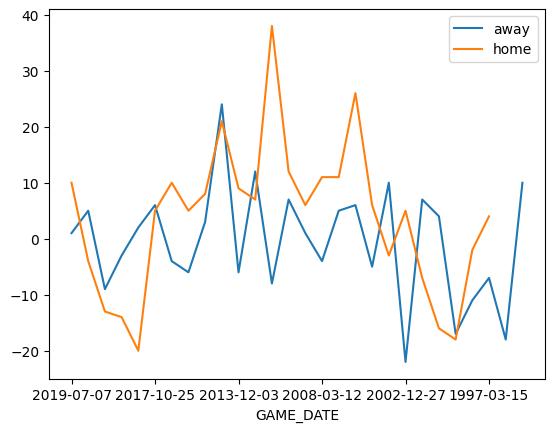

In [17]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)

games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']
print('AVE +/- Home: ', games_home['PLUS_MINUS'].mean())
print('AVE +/- Away: ', games_away['PLUS_MINUS'].mean())

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

AVE +/- Home:  4.006635071090048
AVE +/- Away:  -3.0101790763430727
AVE Points Home:  104.76829268292683
AVE Points Away:  101.12593283582089


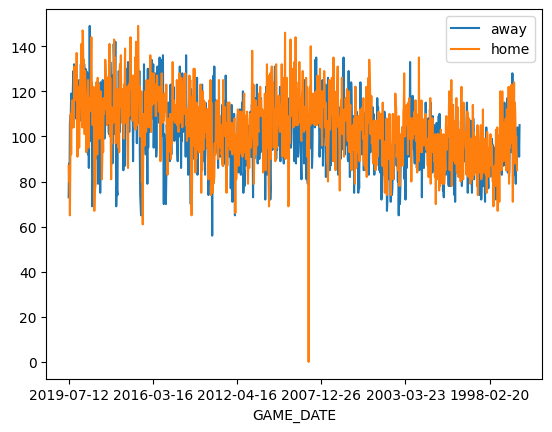

In [23]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)

games_home=games[games['MATCHUP'].str.contains('GSW vs')]
games_away=games[games['MATCHUP'].str.contains('GSW @')]
print('AVE +/- Home: ', games_home['PLUS_MINUS'].mean())
print('AVE +/- Away: ', games_away['PLUS_MINUS'].mean())
print('AVE Points Home: ', games_home['PTS'].mean())
print('AVE Points Away: ', games_away['PTS'].mean())

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PTS', ax=ax)
games_home.plot(x='GAME_DATE',y='PTS', ax=ax)
ax.legend(["away", "home"])
plt.show()

## Module 5 Project 2 ~ Rest APIs and HTTP Requests

In [7]:
import requests

url_get = 'http://httpbin.org/get'
payload={'name':'Joseph', 'ID':'123'}

r = requests.get(url_get, params=payload)
print(r.url)
print(r.request.body)
print(r.status_code)
print(r.headers['Content-Type'])
print(r.text[0:100])
r_json = r.json()
print(r_json)
print(r_json['args'])


http://httpbin.org/get?name=Joseph&ID=123
None
200
application/json
{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    
{'args': {'ID': '123', 'name': 'Joseph'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.5', 'X-Amzn-Trace-Id': 'Root=1-68d5b08a-23875fbf27fdcbd35f9979ca'}, 'origin': '69.222.117.34', 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}
{'ID': '123', 'name': 'Joseph'}


In [10]:
import requests

url_post = 'http://httpbin.org/post'
payload={'name':'Joseph', 'ID':'123'}

r = requests.post(url_post, data=payload)
print('POST request URL:', r.url)
print(r.request.body)
print(r.status_code)
print(r.json()['form'])


POST request URL: http://httpbin.org/post
name=Joseph&ID=123
200
{'ID': '123', 'name': 'Joseph'}


## Module 5 Project 3 ~ Advanced API work

In [19]:
import requests
from bs4 import BeautifulSoup
# Specify the URL of the webpage you want to scrape
url = 'https://www.ibm.com/'
# Send an HTTP GET request to the webpage
response = requests.get(url)
print(response.status_code)
# Store the HTML content in a variable
html_content = response.text
# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')
# Display a snippet of the HTML content
print('HTML Content: ------------------------')
print(html_content[0:500])

print('Links: ------------------------')
# Find all <a> tags (anchor tags) in the HTML
links = soup.find_all('a')
# Iterate through the list of links and print their text
for link in links:
    print(link.text)

200
HTML Content: ------------------------

<!DOCTYPE HTML>
<html lang="en">
<head>
    
    
    
    
    
    
    
      
    
    
    
    
    <meta charset="UTF-8"/>
    <meta name="languageCode" content="en"/>
    <meta name="countryCode" content="us"/>
    <meta name="searchTitle" content="IBM"/>
    <meta name="focusArea" content="Cross IBM SDRs"/>
    <meta name="siteSection" content="home"/>
    <title>IBM</title>
      <script defer="defer" type="text/javascript" src="https://rum.hlx.page/.rum/@adobe/hel
Links: ------------------------


Become a smarter business




Grow operations with agentic AI






























Join IBM’s dev conference for labs, skills and certifications







Get the IBM® Granite® Cookbook








Explore AI courses, APIs, data sets and more







Maximize ROI through smarter governance







New OpenAI open-source models now available on watsonx.ai®







See why Granite Vision tops the SLMs chart in doc understanding







Forres

In [ ]:
import os 
from PIL import Image
from IPython.display import IFrame

url='https://www.ibm.com/'
r=requests.get(url)

print('Access website:', url)
print('Status Code:', r.status_code)
print('Request Headers:')
for header in r.request.headers:
    print('\t', header, '~', r.request.headers[header])
print('Request Body:')
print(r.request.body)
print('Encoding:', r.encoding)
print('Text Sample', r.text[0:50])


Access website: https://www.ibm.com/
Status Code: 200
Request Headers:
	 User-Agent ~ python-requests/2.32.5
	 Accept-Encoding ~ gzip, deflate
	 Accept ~ */*
	 Connection ~ keep-alive
	 Cookie ~ _abck=723BDAE8A51AC9371B3B0D5E4941753A~-1~YAAQivkpF0NkSVKZAQAAW9r3hg50K8sRvUFeAvvM/7dw+DUFZrByb/WkuLpNpuL/hbfPj+j4Dr70wvD0QStjnqzzSqtKZbT8Ja6MVHo+RqweHSuCWBtGaITSMA9zthsHEPBy3KW0fhMvh3fg4bfIlW2ItLPIrfGoSPaqRPWNECPKSJ6hg30jkiChKqGxGfY7FQ0LTzWCuuDHxOXtYlgM66QApq+RfmReNtrc1pvqL6ui2yBIGpCa67SjtwgEGjAnr7rIbXV6x8H0Z8MvFAJD/W+YEl81TAg0kkYn+LakoADMMWDRo4FcAbof+BKJIXEVaDMYhSyDFH9QugzRiDpelUAjevJi3rug7jZM8quofFDpBLP8oW8ZpMx9spjoXXf7586/mvWWfmvMHlbQlnE/c3/ZH3HMHX2/bE7U1FZzo6mQhTI5Mww0iEcEGHYWsnNBbLA=~-1~-1~-1~-1~-1; bm_sz=29E718D73C59DF4CF2FBFEEE3ED94483~YAAQivkpF0RkSVKZAQAAW9r3hh0XcxitEqZbeGcp2JA1rZUVZ//dWv72nhfE3olc2eo77rqgs/EL6YOOE44BRkxJrqkAmTYM32ebo5E0ox5JVV9M+kghOYvJ1UK0PP+NrRuyC45FNg/JQzQYQ0ak3jFOWyE9SVVVwSlc0HE6/a5XTApNaD58HGaAbpretug67aT+Ncy1bsPNVcdS9FPs4IZdDuEh+Klo0Gm+huPB0scNGuIn0sT9DCWErLc0npE

UnidentifiedImageError: cannot identify image file 'c:\\code\\dataScienceCertification\\image.png'

Access website: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png
Status Code: 200
Request Headers:
	 Date ~ Fri, 26 Sep 2025 17:09:16 GMT
	 X-Clv-Request-Id ~ 885b0403-1657-4337-ad32-e77b8ee8c2c3
	 Server ~ Cleversafe
	 X-Clv-S3-Version ~ 2.5
	 Accept-Ranges ~ bytes
	 x-amz-request-id ~ 885b0403-1657-4337-ad32-e77b8ee8c2c3
	 ETag ~ "8bb44578fff8fdcc3d2972be9ece0164"
	 Content-Type ~ image/png
	 Last-Modified ~ Wed, 16 Nov 2022 03:32:41 GMT
	 Content-Length ~ 78776
Content Type: image/png
Request Body:
None
Encoding: None
Text Sample �PNG

IHDR  X     2��G   	pHYs  %  %


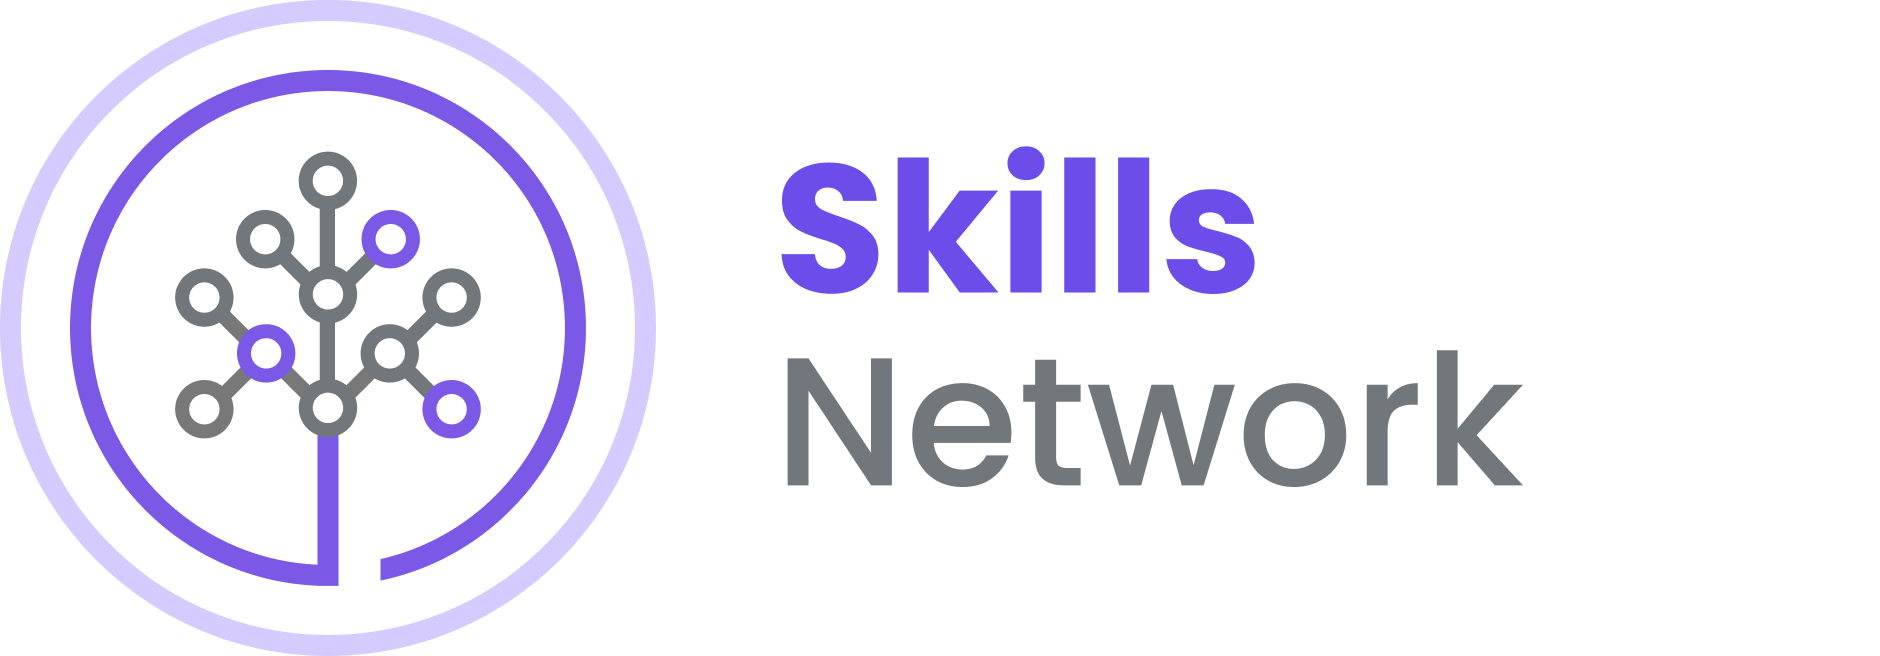

In [39]:
import os 
from PIL import Image
from IPython.display import IFrame

url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png'
r=requests.get(url)

print('Access website:', url)
print('Status Code:', r.status_code)
print('Request Headers:')
for header in r.headers:
    print('\t', header, '~', r.headers[header])
print('Content Type:', r.headers['Content-Type'])
print('Request Body:')
print(r.request.body)
print('Encoding:', r.encoding)
print('Text Sample', r.text[0:50])
path = os.path.join(os.getcwd(), 'image.png')
with open(path, 'wb') as f:
    f.write(r.content)

Image.open(path)

In [ ]:
import os 

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
r=requests.get(URL)

print('Access website:', URL)
print('Status Code:', r.status_code)
print('Request Headers:')
for header in r.headers:
    print('\t', header, '~', r.headers[header])
print('Content Type:', r.headers['Content-Type'])
print('Request Body:', r.request.body)
print('Encoding:', r.encoding)
print('Text Sample', r.text[0:50])
path = os.path.join(os.getcwd(), 'web_scrape_text.txt')
with open(path, 'w') as f:
    f.write(r.text)


Access website: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt
Status Code: 200
Request Headers:
	 Date ~ Fri, 26 Sep 2025 17:12:39 GMT
	 X-Clv-Request-Id ~ a9d89018-8231-4aa1-a1b0-b494e6ef4cf6
	 Server ~ Cleversafe
	 X-Clv-S3-Version ~ 2.5
	 Accept-Ranges ~ bytes
	 x-amz-request-id ~ a9d89018-8231-4aa1-a1b0-b494e6ef4cf6
	 Cache-Control ~ max-age=0,public
	 ETag ~ "522bc63a850f3569b8924c51131d5fe4"
	 Content-Type ~ text/plain
	 Last-Modified ~ Wed, 12 Oct 2022 22:36:17 GMT
	 Content-Length ~ 45
Content Type: text/plain
Request Body:
None
Encoding: ISO-8859-1
Text Sample This is line 1 
This is line 2
This is line 3


In [ ]:
URL = 'http://httpbin.org/get'
payload = {'name': 'Joseph',
           'ID': 123
           }
r=requests.get(URL, params=payload)
print('Access website:', r.url)
print('Status Code:', r.status_code)
print('Request Body:', r.request.body)
print('Encoding:', r.encoding)
print('Request Headers:')
for header in r.headers:
    print('\t', header, '~', r.headers[header])
print('Text Sample:', r.text[0:50])
req_json = r.json()
print('json as dict:', req_json)
print('json args:', req_json['args'])


get_URL = 'http://httpbin.org/get?name=Joseph&ID=123'
r_get = requests.get(get_URL)
print('Access website:', r_get.url)
print('Status Code:', r_get.status_code)

Access website: http://httpbin.org/get?name=Joseph&ID=123
Status Code: 200
Request Body: None
Encoding: utf-8
Request Headers:
	 Date ~ Fri, 26 Sep 2025 17:44:55 GMT
	 Content-Type ~ application/json
	 Content-Length ~ 367
	 Connection ~ keep-alive
	 Server ~ gunicorn/19.9.0
	 Access-Control-Allow-Origin ~ *
	 Access-Control-Allow-Credentials ~ true
Text Sample: {
  "args": {
    "ID": "123", 
    "name": "Josep
json as dict: {'args': {'ID': '123', 'name': 'Joseph'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.5', 'X-Amzn-Trace-Id': 'Root=1-68d6d10f-2b6e3163790de54d15a68eaa'}, 'origin': '69.222.117.34', 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}
json args: {'ID': '123', 'name': 'Joseph'}
Access website: http://httpbin.org/get?name=Joseph&ID=123
Status Code: 200


In [57]:
URL ='http://httpbin.org/post'
payload = {'name': 'Joseph',
           'ID': 123
           }
r=requests.post(URL, params=payload)
print('Access website:', r.url)
print('Status Code:', r.status_code)
print('Request Body:', r.request.body)
print('Encoding:', r.encoding)
print('Request Headers:')
for header in r.headers:
    print('\t', header, '~', r.headers[header])
print('Text Sample:', r.text[0:50])
req_json = r.json()
print('json as dict:', req_json)
print('json form:', req_json['form'])

Access website: http://httpbin.org/post?name=Joseph&ID=123
Status Code: 200
Request Body: None
Encoding: utf-8
Request Headers:
	 Date ~ Fri, 26 Sep 2025 17:56:56 GMT
	 Content-Type ~ application/json
	 Content-Length ~ 459
	 Connection ~ keep-alive
	 Server ~ gunicorn/19.9.0
	 Access-Control-Allow-Origin ~ *
	 Access-Control-Allow-Credentials ~ true
Text Sample: {
  "args": {
    "ID": "123", 
    "name": "Josep
json as dict: {'args': {'ID': '123', 'name': 'Joseph'}, 'data': '', 'files': {}, 'form': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Content-Length': '0', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.5', 'X-Amzn-Trace-Id': 'Root=1-68d6d3e8-3e3e093947821cc903527499'}, 'json': None, 'origin': '69.222.117.34', 'url': 'http://httpbin.org/post?name=Joseph&ID=123'}
json form: {}


None
c:\code\dataScienceCertification
Cleared Image Folder: True
Name: Simon Lo


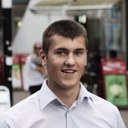

Name: Apolline Petit


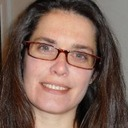

Name: Maddison Grant


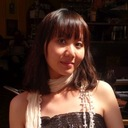

Name: Olivier Harcourt


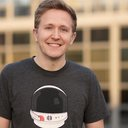

Name: Victor Gallego


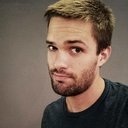

               Name  Gender       City           State  \
0          Simon Lo    male     Souris         Nunavut   
1    Apolline Petit  female     Amiens    Haute-Vienne   
2    Maddison Grant  female  Tipperary          Offaly   
3  Olivier Harcourt    male     Souris    Saskatchewan   
4    Victor Gallego    male     Oviedo  Islas Baleares   

                          Email                       DOB  \
0          simon.lo@example.com  1961-01-15T16:02:53.043Z   
1    apolline.petit@example.com  1985-07-28T20:09:24.976Z   
2    maddison.grant@example.com  1966-06-07T18:34:45.741Z   
3  olivier.harcourt@example.com  1986-07-26T10:44:16.740Z   
4    victor.gallego@example.com  1964-03-08T05:11:04.860Z   

                                            Picture  
0    https://randomuser.me/api/portraits/men/10.jpg  
1  https://randomuser.me/api/portraits/women/53.jpg  
2  https://randomuser.me/api/portraits/women/70.jpg  
3    https://randomuser.me/api/portraits/men/28.jpg  
4    https://r

In [12]:
from randomuser import RandomUser
import requests
import pandas as pd
import os
from IPython.display import IFrame, Image, display

# Import Path
import sys
print(sys.path.append(r'C:\\Code\\Python\\HelperFunctions'))
from helperFunctions import delete_folder_content

def user_dataframe(raw_users):
    users =[]
    try: 
        for user in raw_users:
            users.append({"Name":user.get_full_name(),"Gender":user.get_gender(),"City":user.get_city(),"State":user.get_state(),"Email":user.get_email(), "DOB":user.get_dob(),"Picture":user.get_picture()})
        return pd.DataFrame(users)     
    except Exception as e:
        print('An error has occured:', e)
        return None  

user_num = 5

r = RandomUser()
some_list = r.generate_users(user_num)
df = user_dataframe(some_list)
print(os.getcwd())
delete_status = delete_folder_content('C:\code\dataScienceCertification\images')
print('Cleared Image Folder:', delete_status)
os.chdir('images')
try:
    for user in some_list:
        filename = user.get_full_name().replace(' ', '_') + '.jpg'
        print('Name:', user.get_full_name())
        r = requests.get(user.get_picture())
        if r.status_code == 200:
            with open (filename, 'wb') as f:
                f.write(r.content)
        else:
            print('Error Status Code:', r.status_code)
        display(Image(filename=os.getcwd() + '\\' + filename))
except Exception as e:
    print('Error has occured:', e)
finally:
    os.chdir('..')

print(df.head(user_num))
    


In [11]:
import requests
import json
import math
import pandas as pd

# print('Normalized Json:')
# print(df_normalized)

class Ingredients(object):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.ingredients = dataframe['name']
        self.ingredientsprint = ''
    
    def get_ingredient_list(self, ingredientsPerLine):
        num_ingredients = len(self.dataframe['name'])
        max_str = 0
        tabchar = 5.5
        sortedlist = self.dataframe.sort_values(by='name')['name']
        sortedlist = sortedlist.reset_index(drop=True)
        for ingredient in sortedlist:
            if len(ingredient) > max_str:
                max_str = len(ingredient)
        print(max_str)
        index = 0
        while index < num_ingredients:
            outline = ''
            for i in range(ingredientsPerLine):
                try:
                    outline += sortedlist[i+index]
                    divisor = math.floor((max_str - len(sortedlist[i+index])) / tabchar) + 1
                    for i in range(divisor):
                        outline += '\t' 
                except:
                    next
            self.ingredientsprint += outline
            self.ingredientsprint += '\n'
            index += ingredientsPerLine
        self.ingredients = self.ingredients[:-1]
        print(self.ingredientsprint)
    
    def get_nutrition(self, key):
        if type(key) != type('fruit'):
            key = str(key)
        try:
            df_nutrition = self.dataframe.loc[self.dataframe['name']==key]
            output = df_nutrition.iloc[0].to_frame()
            print('Nutrition for', key)
            print(output)
        except TypeError as e:
            print('Error Invalid Input of:', key, '\nDetails:', e)
        except (KeyError, IndexError) as e:
            print('Error Invalid Fruit Input of:', key, '\nDetails:', e)
        except Exception as e:
            print('An Error has occured:', e)


data = requests.get("https://web.archive.org/web/20240929211114/https://fruityvice.com/api/fruit/all")
results = json.loads(data.text)

df_normalized = pd.json_normalize(results)
ingredients = Ingredients(df_normalized)
ingredients.get_ingredient_list(5)
ingredients.get_nutrition('Durian')
print(ingredients.dataframe.sort_values(by='nutritions.protein',ascending=True)[['name','nutritions.protein']])

18
Annona			Apple			Apricot			Avocado			Banana			
Blackberry		Blueberry		Ceylon Gooseberry	Cherry			Cranberry		
Dragonfruit		Durian			Feijoa			Fig			Gooseberry		
Grape			GreenApple		Guava			Hazelnut		Horned Melon		
Jackfruit		Japanese Persimmon	Kiwi			Kiwifruit		Lemon			
Lime			Lingonberry		Lychee			Mango			Mangosteen		
Melon			Morus			Orange			Papaya			Passionfruit		
Peach			Pear			Persimmon		Pineapple		Pitahaya		
Plum			Pomegranate		Pomelo			Pumpkin			Raspberry		
Strawberry		Tangerine		Tomato			Watermelon		

Nutrition for Durian
                                  5
name                         Durian
id                               60
family                    Malvaceae
order                      Malvales
genus                         Durio
nutritions.calories             147
nutritions.fat                  5.3
nutritions.sugar               6.75
nutritions.carbohydrates       27.1
nutritions.protein              1.5
                  name  nutritions.protein
0            Persimmon  

In [30]:
import requests
import json
import pandas as pd
import random as rnd
from time import sleep

url = 'https://official-joke-api.appspot.com/jokes/random/451'

class jokester(object):
    def __init__(self, dataset):
        self.dataset = dataset
        self.categories = []
        self.categorylist()

    def categorylist(self):
        categories = self.dataset['type'].unique()
        self.categories.extend(categories)

    def printcategories(self):
        print('Selectable Joke Categories:')
        for category in self.categories:
            print('\t', category)

    def tellmeajoke(self, category=None):
        try:
            if category:
                if type(category) != type('knock-knock'):
                    category = str(category)
                print(category.title() + ' Joke Incoming:')
                df_jokelist = self.dataset[self.dataset['type']==category][['setup','punchline']]
            else:
                print('Random Joke Incoming:')
                df_jokelist = self.dataset[['setup','punchline']]
            df_jokelist = df_jokelist.reset_index(drop=False)
            num_jokes = len(df_jokelist)
            joke_index = rnd.randint(0, num_jokes - 1)
            setup = df_jokelist.loc[joke_index, 'setup']
            punchline = df_jokelist.loc[joke_index, 'punchline']
            print(setup)
            sleep(1)
            print('.')
            sleep(1)
            print('.')
            sleep(1)
            print('.')
            sleep(1)
            print(punchline)
        except (TypeError, KeyError) as e:
            print('Check Cateogry:', category, 'is invalid.')
            print('Details:', e)
        except Exception as e:
            print('Error has occured.')
            print('Details:', e)
        
r = requests.get(url)
print('Status:', r.status_code)
rjson = json.loads(r.text)
df = pd.DataFrame(rjson)
df = df.sort_values(by='id').set_index('id')

jokes = jokester(df)
jokes.printcategories()
jokes.tellmeajoke()
sleep(3)
jokes.tellmeajoke()



Status: 200
Selectable Joke Categories:
	 general
	 knock-knock
	 programming
	 dad
Random Joke Incoming:
What is the leading cause of dry skin?
.
.
.
Towels
Random Joke Incoming:
Why are skeletons so calm?
.
.
.
Because nothing gets under their skin.


## Module 5 Project 4 ~ Web Scraping

In [47]:
## EXAMPLE SYNTAX

# Beautiful Soup ~ BeautifulSoup is a Python library used for web scraping purposes to pull the data out of HTML and XML files. It creates a parse tree from page source code that can be used to extract data in a hierarchical and more readable manner.
import bs4 as BeautifulSoup
import requests
url = ''
r = requests.get(url)
print('HTTP Status:', r.status_code)
soup = BeautifulSoup(r.content, 'html.parser')

# Scrapy ~ Scrapy is an open-source and collaborative web crawling framework for Python. It is used to extract the data from the website.
import scrapy
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = ['http://quotes.toscrape.com/tag/humor/',]
    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {'quote': quote.css('span.text::text').get()}

# Selenium ~ Selenium is a tool used for controlling web browsers through programs and automating browser tasks.
from selenium import webdriver
driver = webdriver.Firefox()
driver.get("http://www.example.com")

MissingSchema: Invalid URL '': No scheme supplied. Perhaps you meant https://?

In [ ]:
# Webscraping HTML using pandas

import pandas as pd
import requests

URL = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
headers = {"User-Agent": "Unofficial educational activity as part of data science curriculum involving web-scraping exercises"} 
r = requests.get(URL, headers=headers)
print(r.status_code)
tables = pd.read_html(r.text)
df = tables[0]
print(df)

200
    Rank                                Bank name  \
0      1  Industrial and Commercial Bank of China   
1      2               Agricultural Bank of China   
2      3                  China Construction Bank   
3      4                            Bank of China   
4      5                           JPMorgan Chase   
..   ...                                      ...   
95    96                            Handelsbanken   
96    97                 Industrial Bank of Korea   
97    98                                      DNB   
98    99                      Qatar National Bank   
99   100                  National Bank of Canada   

    Total assets (2024) (US$ billion)  
0                             6303.44  
1                             5623.12  
2                             5400.28  
3                             4578.28  
4                             4002.81  
..                                ...  
95                             351.79  
96                             345.81  

C:\Users\Justin King\AppData\Local\Temp\ipykernel_19256\3771896287.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


In [ ]:
# Webscraping HTML using pandas

import pandas as pd
import requests

URL = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
headers = {"User-Agent": "Unnoficial educational activity as part of data science curriculum involving web-scraping exercises"} 
r = requests.get(URL, headers=headers)
print(r.status_code)
tables = pd.read_html(r.text)
df = tables[2]
print(df)

200
    Country/Territory IMF (2025)[1][6] World Bank (2022–24)[7]  \
0               World        113795678               111326370   
1       United States         30507217                29184890   
2          China[n 1]         19231705                18743803   
3             Germany          4744804                 4659929   
4               India          4187017                 3912686   
..                ...              ...                     ...   
217          Kiribati              312                     308   
218  Marshall Islands              297                     280   
219             Nauru              169                     160   
220        Montserrat                —                       —   
221            Tuvalu               65                      62   

    United Nations (2023)[8]  
0                  100834796  
1                   27720700  
2                   17794782  
3                    4525704  
4                    3575778  
..               

C:\Users\Justin King\AppData\Local\Temp\ipykernel_19256\3490680034.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


In [ ]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"
soup = BeautifulSoup(html, 'html.parser')

# Prints in viewable HTML tree form
# print(soup.prettify())

tag_object=soup.title
print("tag object:",tag_object)
print("tag object type:",type(tag_object))


tag_object2=soup.h3
print('tag object 2:', tag_object2)


tag_child =tag_object2.b
print('Child:', tag_child)
tag_parent =tag_child.parent
print('Parent:', tag_parent)

sibling_1=tag_object2.next_sibling
print('First Sibiling;', sibling_1)
sibling_2=sibling_1.next_sibling
print('Second Sibiling;', sibling_2)
sibling_3=sibling_2.next_sibling
print('Third Sibiling;', sibling_3)

print('Child Attr:', tag_child.attrs)
print('get id:', tag_child.get('id'))
print('tag string:', tag_child.string)
print('tag string type:', type(tag_child.string))


tag object: <title>Page Title</title>
tag object type: <class 'bs4.element.Tag'>
tag object 2: <h3><b id="boldest">Lebron James</b></h3>
Child: <b id="boldest">Lebron James</b>
Parent: <h3><b id="boldest">Lebron James</b></h3>
First Sibiling; <p> Salary: $ 92,000,000 </p>
Second Sibiling; <h3> Stephen Curry</h3>
Third Sibiling; <p> Salary: $85,000, 000 </p>
Child Attr: {'id': 'boldest'}
get id: boldest
tag string: Lebron James
tag string type: <class 'bs4.element.NavigableString'>


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

URL = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
headers = {"User-Agent": "Unnoficial educational activity as part of data science curriculum involving web-scraping exercises"} 
r = requests.get(URL, headers=headers)
print(r.status_code)
tables = pd.read_html(r.text)
soup = BeautifulSoup(r.text, 'html.parser')
df_table = tables[2]
soup_table_headers = soup.find_all(['table', 'th'])
soup_table = soup.find_all(['table', 'th', 'tr','td'])
print(soup_table_headers)
# print(df)

200


C:\Users\Justin King\AppData\Local\Temp\ipykernel_19256\3926168307.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


[<table border="0" cellpadding="2" cellspacing="0" style="float:right;">
<tbody><tr>
<td><div class="timeline-wrapper"><map name="timeline_tm3lt23yfyneimycfsnoahb2vr2vw0s"></map><img src="//upload.wikimedia.org/wikipedia/en/timeline/tm3lt23yfyneimycfsnoahb2vr2vw0s.png" usemap="#timeline_tm3lt23yfyneimycfsnoahb2vr2vw0s"/></div>
</td></tr>
<tr>
<td style="text-align:center; font-size:90%;">Largest economies in the world by GDP (nominal) in 2025<br/>according to <a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> estimates<sup class="reference" id="cite_ref-China-THM_1-0"><a href="#cite_note-China-THM-1"><span class="cite-bracket">[</span>n 1<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-GDP_IMF_2-0"><a href="#cite_note-GDP_IMF-2"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
</td></tr></tbody></table>, <table width="100%"> <tbody><tr> <td style="vertical-align

In [ ]:
# Example Scrape all Hyperlinks

import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "http://www.ibm.com"
r = requests.get(url) 
print('HTTP Status:', r.status_code)
soup = BeautifulSoup(r.text,"html.parser")
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>
    print(link.get('href'))


HTTP Status: 200
https://www.ibm.com/think/insights/lets-create-smarter-business?lnk=hpls1us
https://www.ibm.com/thought-leadership/institute-business-value/report/2025-coo?lnk=hpls2us
https://newsroom.ibm.com/2025-09-25-hashicorp-previews-the-future-of-agentic-infrastructure-automation-with-project-infragraph
https://newsroom.ibm.com/2025-09-24-new-ibm-watsonx-ai-powered-insights-help-elevate-espn-fantasy-football-for-2025-fantasy-football-season
https://newsroom.ibm.com/2025-09-24-screen-and-ibm-sign-agreement-for-next-generation-euv-lithography-cleaning-process-development
https://newsroom.ibm.com/2025-09-17-ibm-and-bharatgen-collaborate-to-accelerate-ai-adoption-in-India-powered-by-Indic-large-language-models
https://newsroom.ibm.com/2025-09-03-IBM-Addresses-the-AI-Adoption-Gap-with-Lets-create-smarter-business
https://newsroom.ibm.com/2025-08-26-ibm-and-amd-join-forces-to-build-the-future-of-computing
https://newsroom.ibm.com/2025-08-20-ibm-and-nasa-release-groundbreaking-open-sou

In [ ]:
# Example Scrape all Images

import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "http://www.ibm.com"
r = requests.get(url) 
print('HTTP Status:', r.status_code)
soup = BeautifulSoup(r.text,"html.parser")

for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))

HTTP Status: 200
<img alt="Circles and vertical lines with two black X's" class="cmp-image__image" height="800" itemprop="contentUrl" loading="lazy" src="https://assets.ibm.com/is/image/ibm/homepage-smarterbusiness-r4u-1?ts=1757421775193&amp;dpr=off" srcset="data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==" title="Tic-tac-toe grid with bold X marks" width="800"/>
https://assets.ibm.com/is/image/ibm/homepage-smarterbusiness-r4u-1?ts=1757421775193&dpr=off
<img alt="Four targets with black circles progressively getting closer to the center target" class="cmp-image__image" height="800" itemprop="contentUrl" loading="lazy" src="https://assets.ibm.com/is/image/ibm/homepage-smarterbusiness-r4u-2?ts=1757421770264&amp;dpr=off" srcset="data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==" title="Abstract concentric circles in gradient tones" width="800"/>
https://assets.ibm.com/is/image/ibm/homepage-smarterbusiness-r4u-2?ts=1757421770264&dpr=off
<i

In [ ]:
# Example Scrape from Tables

#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

import requests
import pandas as pd
from bs4 import BeautifulSoup

r = requests.get(url) 
print('HTTP Status:', r.status_code)
soup = BeautifulSoup(r.text,"html.parser")

#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

HTTP Status: 200
Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


## Module 5 Project 5 ~ Working with Different File Formats

### CSV Format

In [ ]:
import requests 
import pandas as pd
import sys

sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file
filename = 'addresses.csv'


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"
download_file(url, filename)
df = pd.read_csv(filename, header=None)

headers = ['First Name', 'Last Name', 'Location ', 'City','State','Area Code']

df.columns = headers
print(df.head())


file download successfully to addresses.csv
      First Name Last Name                         Location        City State  \
0           John       Doe                 120 jefferson st.  Riverside    NJ   
1           Jack  McGinnis                      220 hobo Av.      Phila    PA   
2  John "Da Man"    Repici                 120 Jefferson St.  Riverside    NJ   
3        Stephen     Tyler  7452 Terrace "At the Plaza" road   SomeTown    SD   
4            NaN  Blankman                               NaN   SomeTown    SD   

   Area Code  
0       8075  
1       9119  
2       8075  
3      91234  
4        298  


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]))
print(df)

print(df.transform(func=lambda x: x + 10))
print(df.transform(func= ['sqrt']))

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9
    0   1   2
0  11  12  13
1  14  15  16
2  17  18  19
          0         1         2
       sqrt      sqrt      sqrt
0  1.000000  1.414214  1.732051
1  2.000000  2.236068  2.449490
2  2.645751  2.828427  3.000000


### json Format

In [ ]:
import json


person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}

with open('person.json', 'w') as f:  # writing JSON object
    json.dump(person, f)
    
with open('person2.json', 'w') as f:
    json_object = json.dumps(person, indent = 4)
    f.write(json_object)
    print(json_object)
    print(type(json_object))

{
    "first_name": "Mark",
    "last_name": "abc",
    "age": 27,
    "address": {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}
<class 'str'>


### XLSX Format

In [ ]:
import pandas as pd

import sys
sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

filename = 'xlsx_example.xlsx'
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx"
download_file(url, filename)

df = pd.read_excel(filename)
df.head()

file download successfully to xlsx_example.xlsx


,0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468


### XML File Format

In [ ]:
import xml.etree.ElementTree as ET

employee = ET.Element('employee')
details = ET.SubElement(employee, 'details')
first = ET.SubElement(details, 'firstname')
second = ET.SubElement(details, 'lastname')
third = ET.SubElement(details, 'age')
first.text = 'Shiv'
second.text = 'Mishra'
third.text = '23'

mydata1 = ET.ElementTree(employee)

with open('sample_xml.xml', 'wb') as files:
    mydata1.write(files)


In [ ]:
import xml.etree.ElementTree as etree
import pandas as pd

import sys
sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

filename = 'Sample-employee-XML-file.xml'
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Sample-employee-XML-file.xml"
download_file(url, filename)

tree = etree.parse(filename)
root = tree.getroot()
print(tree)
print(root)

columns = ['firstname', 'lastname', 'title', 'division', 'building', 'room']
employee_df = pd.DataFrame(columns=columns)

for node in root:
    firstname = node.find('firstname').text
    lastname = node.find('lastname').text
    title = node.find('title').text
    division = node.find('division').text
    building = node.find('building').text
    room = node.find('room').text

    row_df = pd.DataFrame([[firstname, lastname, title, division, building, room]],columns=columns)
    employee_df = pd.concat([employee_df, row_df], ignore_index=True)

employee_pd = pd.read_xml(filename, xpath='/employees/details')
print('XML Element Tree:')
print(employee_df)
print('Pandas XML Read:')
print(employee_pd)

employee_pd.to_csv('employee.csv', index=False)
# with open('employees.csv', 'w') as f:


file download successfully to Sample-employee-XML-file.xml
<Element 'employees' at 0x0000026DAC11C8B0>
XML Element Tree:
  firstname lastname      title  division building room
0      Shiv   Mishra   Engineer  Computer      301   11
1       Yuh    Datta  developer  Computer      303   02
2     Rahil     Khan     Tester  Computer      304   10
3      Deep   Parekh   Designer  Computer      305   14
Pandas XML Read:
  firstname lastname      title  division  building  room
0      Shiv   Mishra   Engineer  Computer       301    11
1       Yuh    Datta  developer  Computer       303     2
2     Rahil     Khan     Tester  Computer       304    10
3      Deep   Parekh   Designer  Computer       305    14


### Read/Save Other Data Formats

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |


### Image Formats

In [48]:
from PIL import Image

import sys
sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

filename = 'dog.jpg'
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"
download_file(url, filename)

img = Image.open(filename, 'r')
img.show()



file download successfully to dog.jpg


file download successfully to diabetes.csv
df.head():
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies        

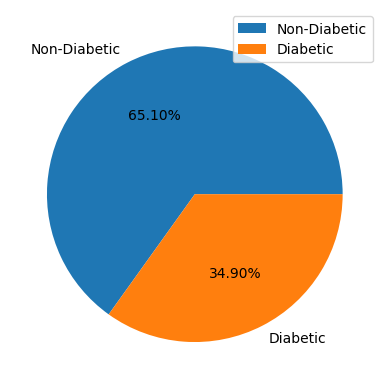

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

filename = 'diabetes.csv'
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

download_file(url, filename)

df = pd.read_csv(filename)
print('df.head():')
print(df.head())
print('df.info():')
print(df.info())
print('df.describe():')
print(df.describe())

missing_data = df.isnull()
print('df.isnull() ~ missing data & Counts:')
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

print('df.dtypes:')
print(df.dtypes)

print('Visualization:')
labels = 'Non-Diabetic', 'Diabetic'
plt.pie(df['Outcome'].value_counts(), labels=labels, autopct='%0.02f%%')
plt.legend()
plt.show()


## Module 5 Project 6 GDP Extraction and Processing

In [104]:
import requests
import numpy as np
import pandas as pd

url = 'https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29'

r = requests.get(url)

print('HTTP Status:', r.status_code)
df_raw = pd.read_html(r.text)
fetch_columns = [('Country/Territory', 'Country/Territory'), ('UN region','UN region'),('IMF[1][13]','Estimate'),('World Bank[14]', 'Estimate'),('United Nations[15]','Estimate')]
output_columns = ['Country', 'Region', 'IMF Est. ($B)', 'World Bank Est. ($B)', 'UN Est. ($B)']
df_countries_full = df_raw[2][fetch_columns]
df_countries_full.columns = output_columns
for key in ['IMF Est. ($B)', 'World Bank Est. ($B)', 'UN Est. ($B)']:
    for index in df_countries_full[key].index.to_list(): 
        try:
            df_countries_full.loc[index, key] = np.round(float(df_countries_full.loc[index, key])/1000, 2)
        except ValueError as e:
            df_countries_full.loc[index, key] = None  
df_countries_full['Average Est. ($B)'] = df_countries_full[['IMF Est. ($B)', 'World Bank Est. ($B)', 'UN Est. ($B)']].mean(axis=1)
for index in df_countries_full['Average Est. ($B)'].index.to_list():
    if df_countries_full.loc[index, 'Average Est. ($B)']:
        df_countries_full.loc[index, 'Average Est. ($B)'] = np.round(df_countries_full.loc[index, 'Average Est. ($B)'], 2)
df_countries_top10 = df_countries_full[df_countries_full['Country']!='World'].sort_values(by='Average Est. ($B)',ascending=False).head(10).reset_index(drop=True)
print(df_countries_top10)

filename = 'largest_economies.csv'
try:
    df_countries_top10.to_csv(filename,index=False)
    print('successfully wrote file:', filename)
except Exception as e:
    print('An error has occured:', e)


HTTP Status: 200
          Country    Region IMF Est. ($B) World Bank Est. ($B) UN Est. ($B)  \
0   United States  Americas       26854.6              25462.7     23315.08   
1           China      Asia      19373.59             17963.17     17734.13   
2           Japan      Asia       4409.74              4231.14      4940.88   
3         Germany    Europe       4308.85              4072.19      4259.94   
4           India      Asia       3736.88              3385.09      3201.47   
5  United Kingdom    Europe       3158.94              3070.67      3131.38   
6          France    Europe       2923.49               2782.9      2957.88   
7           Italy    Europe       2169.74              2010.43       2107.7   
8          Canada  Americas       2089.67              2139.84      1988.34   
9          Russia    Europe       2062.65              2240.42      1778.78   

  Average Est. ($B)  
0          25210.79  
1          18356.96  
2           4527.25  
3           4213.66  
4  

C:\Users\Justin King\AppData\Local\Temp\ipykernel_11464\3893768080.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_raw = pd.read_html(r.text)
C:\Users\Justin King\AppData\Local\Temp\ipykernel_11464\3893768080.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_full.loc[index, key] = np.round(float(df_countries_full.loc[index, key])/1000, 2)
C:\Users\Justin King\AppData\Local\Temp\ipykernel_11464\3893768080.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_ful

successfully wrote file: largest_economies.csv
